In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import matplotlib
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics

import scipy.stats
import seaborn as sns
import statsmodels.api as sm

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df= pd.read_csv("/content/gdrive/MyDrive/Copy of Dataset.csv")

## converting price to USD and round to nearest cent: 

df["price"] = round(df["price"]*0.0133500369,2) 
df


,Unnamed: 0,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,...,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
0,0,0,2016,Honda,Honda Brio S MT,Brio,5673.77,9680.0,Petrol,Mumbai,...,0,2.352941e-06,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.000000
1,1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,4338.76,119120.0,Diesel,Mumbai,...,0,3.076923e-06,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.000000
2,2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,35377.60,64593.0,Diesel,Thane,...,0,3.773585e-07,0.000015,0.250000,1.000000,0.019416,0.004978,1.000000,96.646020,0.000000
3,3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,56003.40,25000.0,Diesel,Mumbai,...,1,2.383790e-07,0.000040,0.250000,0.500000,0.010692,0.013563,0.493750,71.604306,71.604306
4,4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,6341.27,23800.0,Diesel,Mumbai,...,0,2.105263e-06,0.000042,0.111111,0.071429,0.127871,0.014269,0.059821,109.150857,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,1720,1720,2015,Hyundai,Hyundai Eon Era +,Eon,3871.51,38000.0,Petrol,Pune,...,0,3.448276e-06,0.000026,0.166667,0.071429,0.212168,0.008771,0.059821,111.327773,0.000000
1721,1721,1721,2011,Bentley,Bentley Continental Flying Spur W12,Continental,100125.28,36000.0,Petrol,Pune,...,0,1.333333e-07,0.000028,0.100000,0.022727,0.004099,0.009283,0.010511,0.399987,0.000000
1722,1722,1722,2008,Mahindra-Renault,Mahindra-Renault Logan DLE 1.5 dci,Logan,2469.76,142522.0,Diesel,Pune,...,0,5.405405e-06,0.000007,0.076923,0.041667,0.335011,0.002014,0.029687,20.026662,0.000000
1723,1723,1723,1990,Mahindra,Mahindra Jeep CJ 500 D,Jeep,4338.76,18581.0,Diesel,Pune,...,0,3.076923e-06,0.000054,0.032258,0.041667,0.188859,0.018402,0.029687,103.172958,0.000000


Below are visualizations for different features, here we are conducting EDA

<BarContainer object of 5 artists>

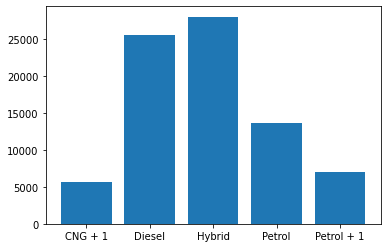

In [ ]:
##Fuel type vs average price of car 


fuel_price = df.groupby("fuel_type").agg(np.mean).reset_index()[["fuel_type","price"]]

plt.bar(fuel_price["fuel_type"],fuel_price["price"])

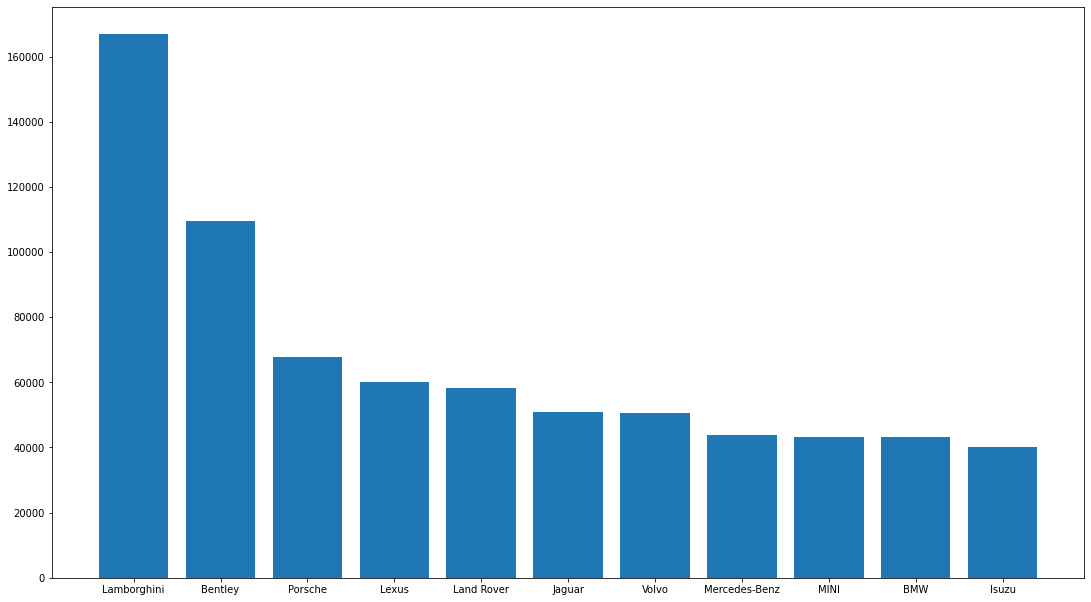

In [ ]:
##brand of car vs price of car only top 10 highest and top 10 lowest pricing shown-- as there are too many rows

#This is top 10 highest average priced cars 
brand_price_highest = df.groupby("brand").agg(np.mean).reset_index()[["brand","price"]].sort_values("price",ascending=False)[:11]

plt.bar(brand_price_highest["brand"],brand_price_highest["price"])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

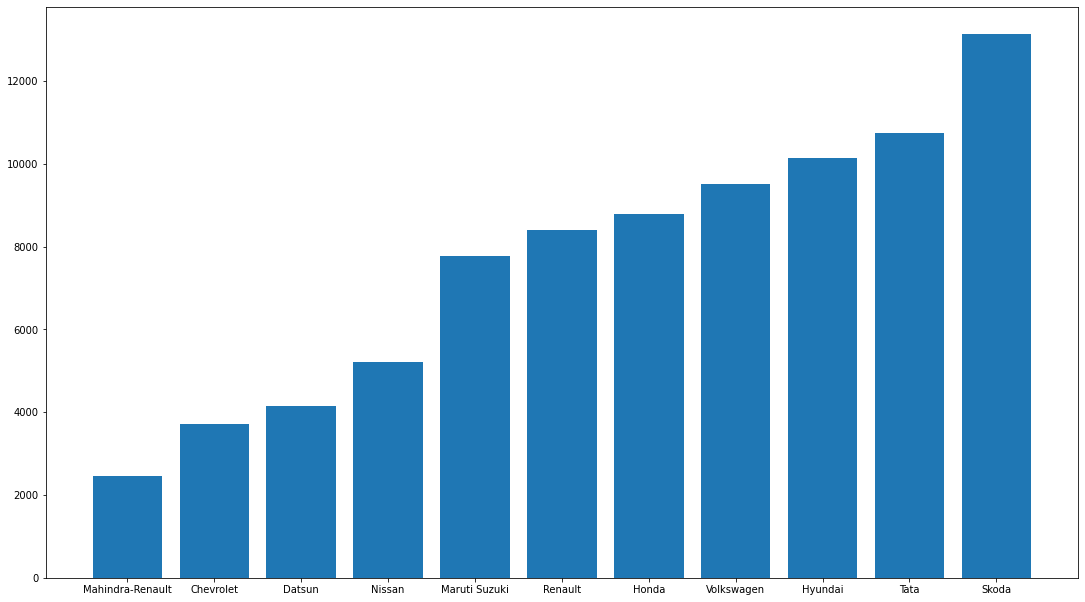

In [ ]:
##Below are the lowest priced cars 

brand_price_lowest = df.groupby("brand").agg(np.mean).reset_index()[["brand","price"]].sort_values("price",ascending=True)[:11]

plt.bar(brand_price_lowest["brand"],brand_price_lowest["price"])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

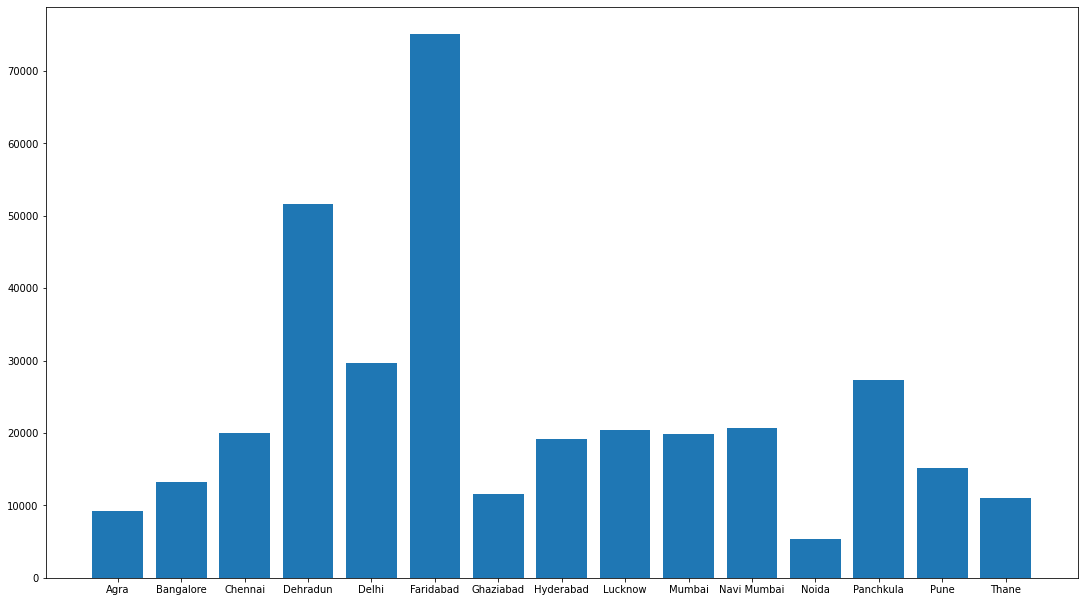

In [ ]:
#Next we check the average sale price per city 


city_price = df.groupby("city").agg(np.mean).reset_index()[["city","price"]]
plt.bar(city_price["city"],city_price["price"])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

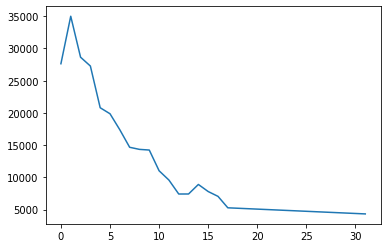

In [ ]:
##Next we see if there is a correlation between the price and age of a car 


price_age = df[["price","car_age"]].groupby("car_age").agg(np.mean).reset_index()
plt.plot(price_age["car_age"],price_age["price"])

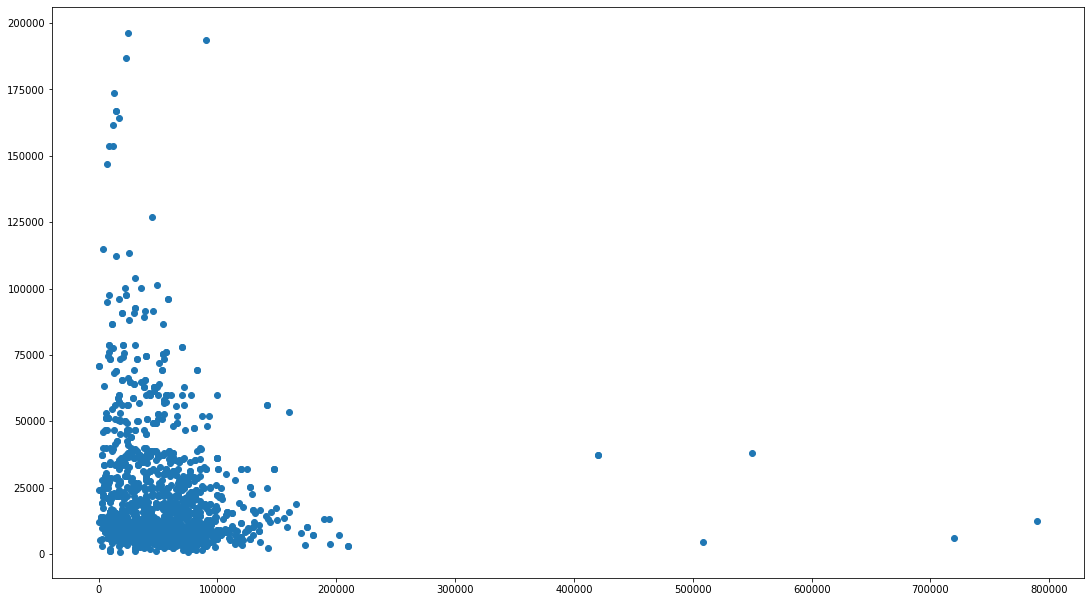

In [ ]:
##Distance traveled vs price of the car

price_distance = df[["price","distance_travelled(kms)"]]
plt.scatter(price_distance["distance_travelled(kms)"],price_distance["price"])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


<BarContainer object of 2 artists>

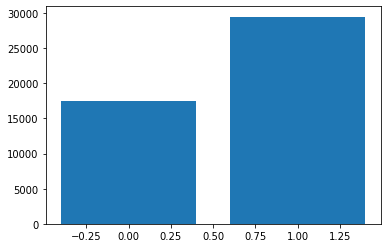

In [ ]:
## New/less used vs average price 
price_new = df[["price","new and less used"]]
grouped = price_new.groupby("new and less used").agg(np.mean).reset_index()
plt.bar(grouped["new and less used"],grouped["price"])

<BarContainer object of 19 artists>

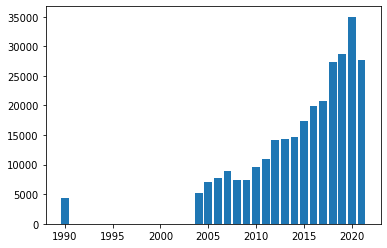

In [ ]:
## year of car  vs average price 
price_year = df[["price","year"]]
grouped_year = price_year.groupby("year").agg(np.mean).reset_index()
plt.bar(grouped_year["year"],grouped_year["price"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


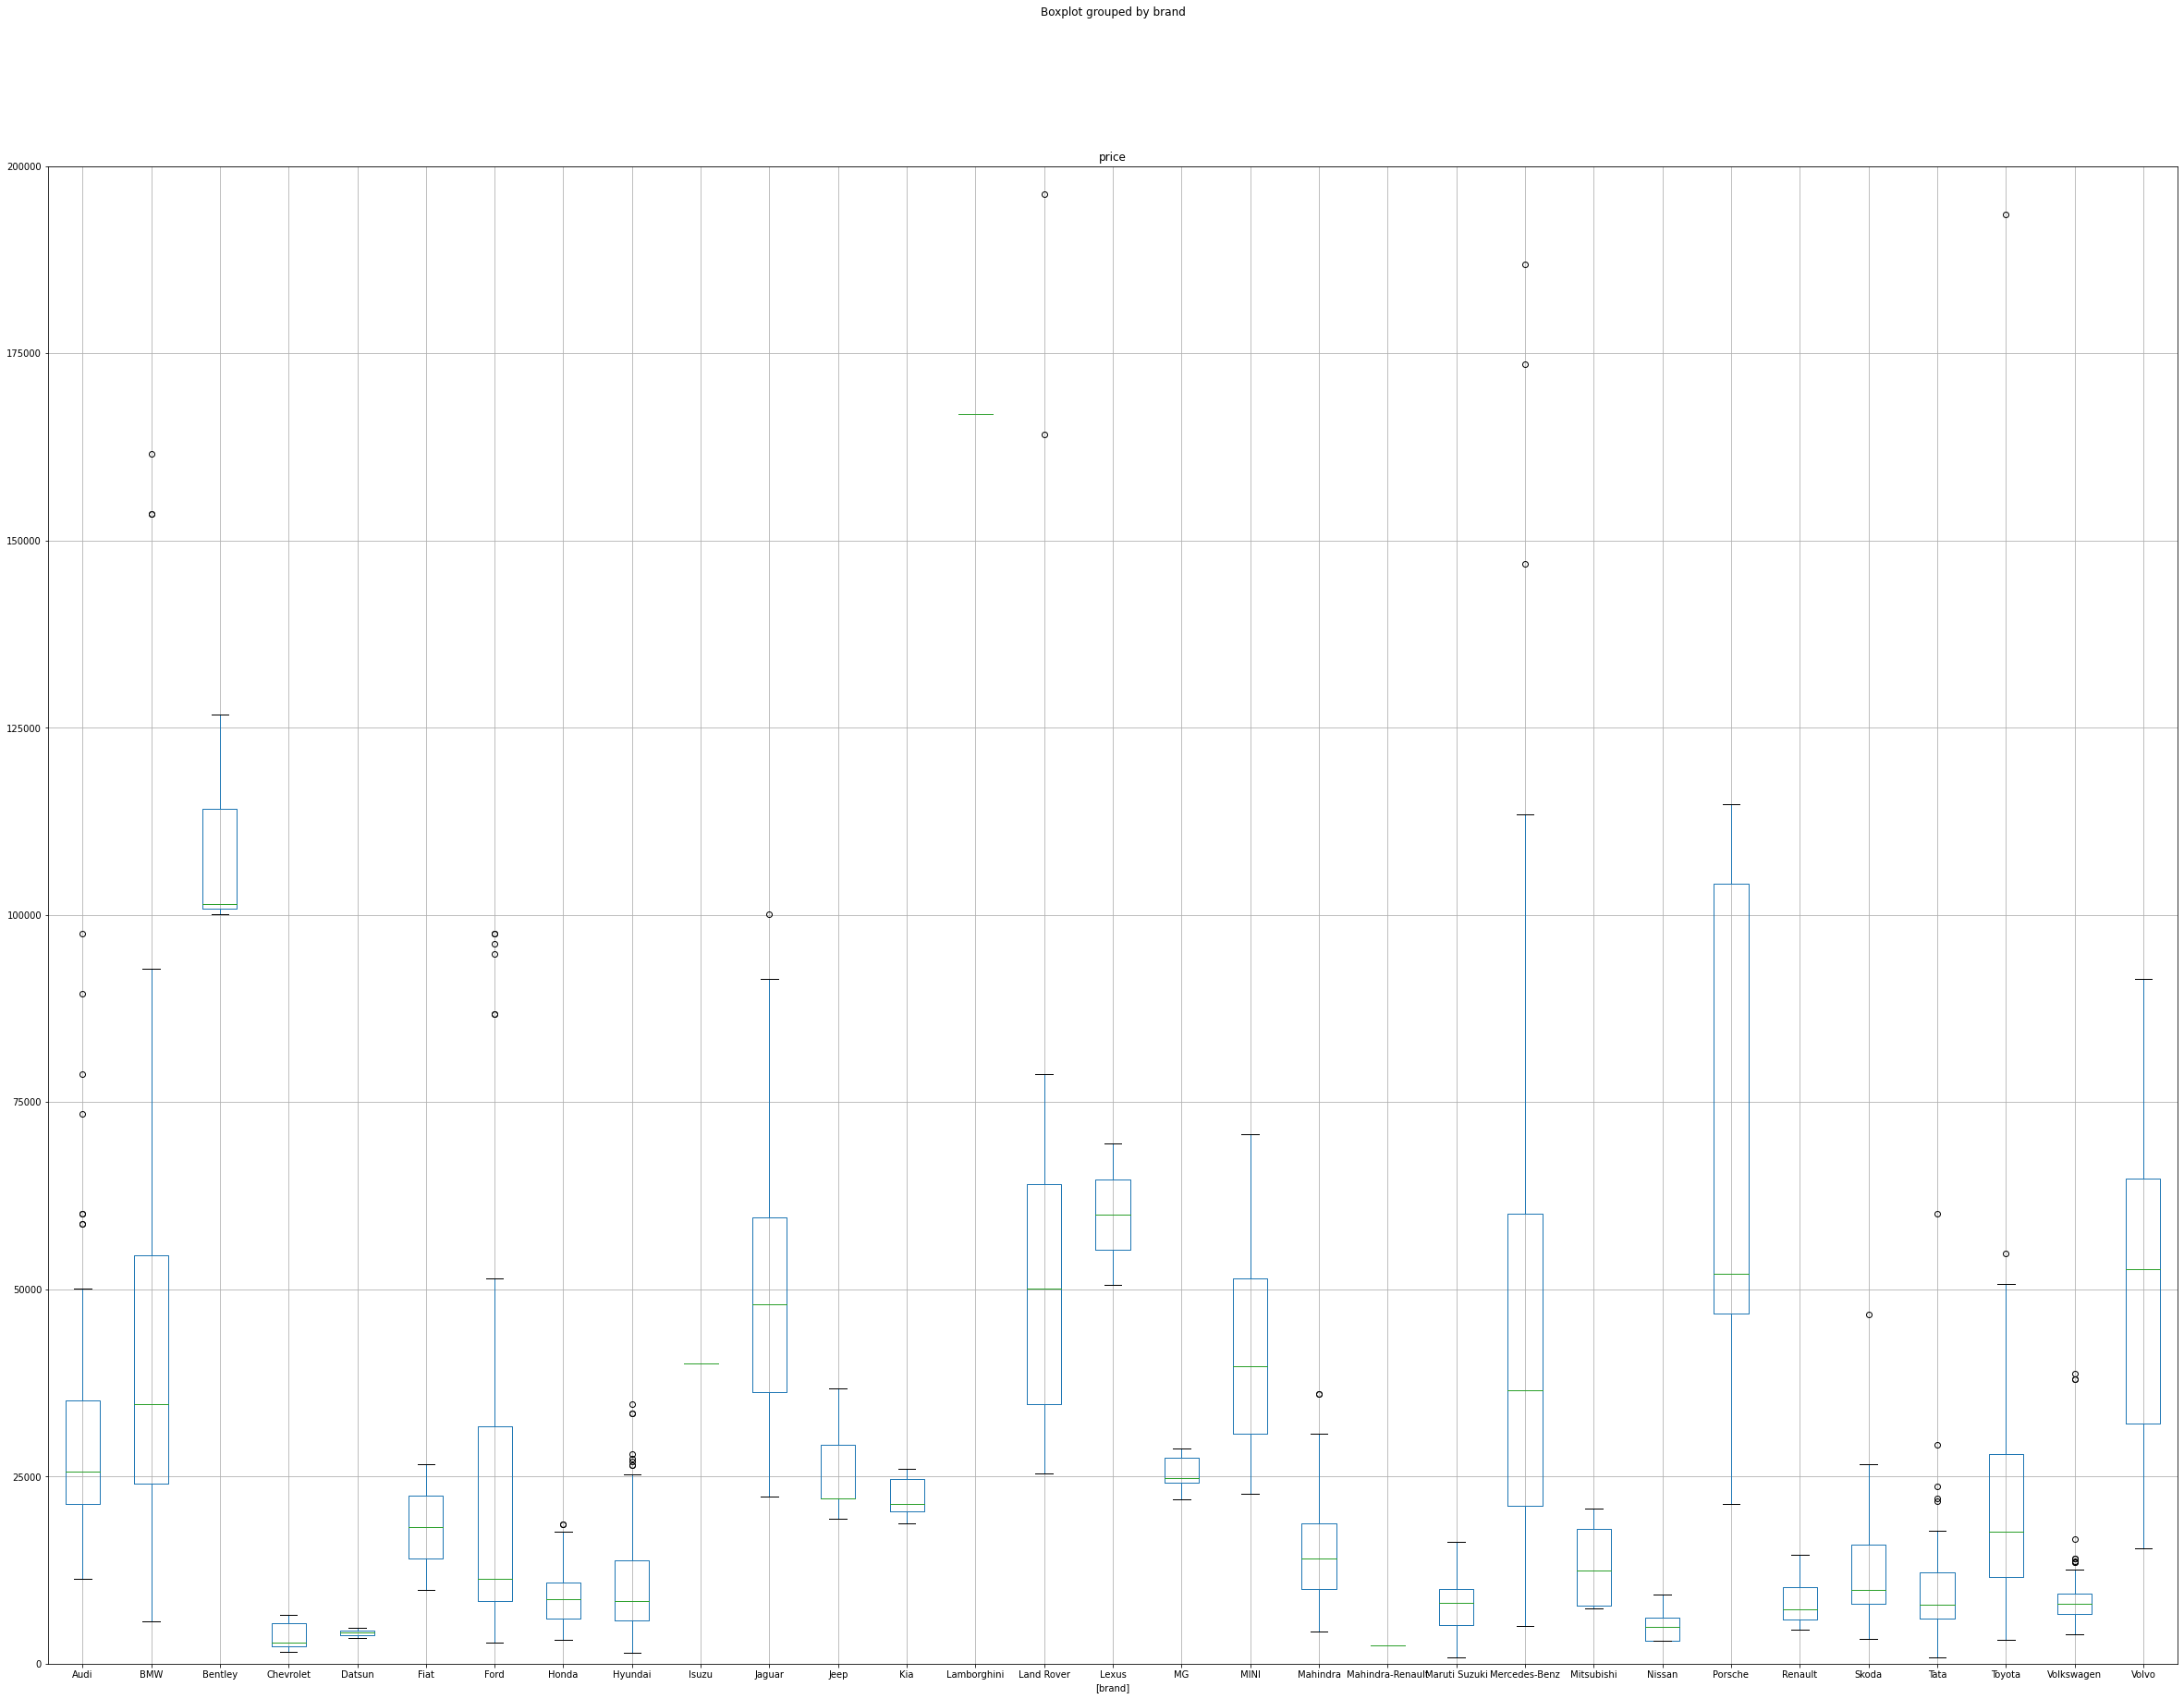

In [ ]:
brand_box = df[["price","brand"]]
brand_box.boxplot(by="brand")
plt.ylim(0, 200000)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(40, 30)

In [ ]:
brand_box.sort_values(by="price",ascending=False)

,price,brand
376,196245.54,Land Rover
377,193575.54,Toyota
806,186900.52,Mercedes-Benz
1537,173550.48,Mercedes-Benz
68,166875.46,Lamborghini
...,...,...
965,1268.25,Tata
1252,1068.00,Tata
1006,1068.00,Tata
281,867.75,Tata


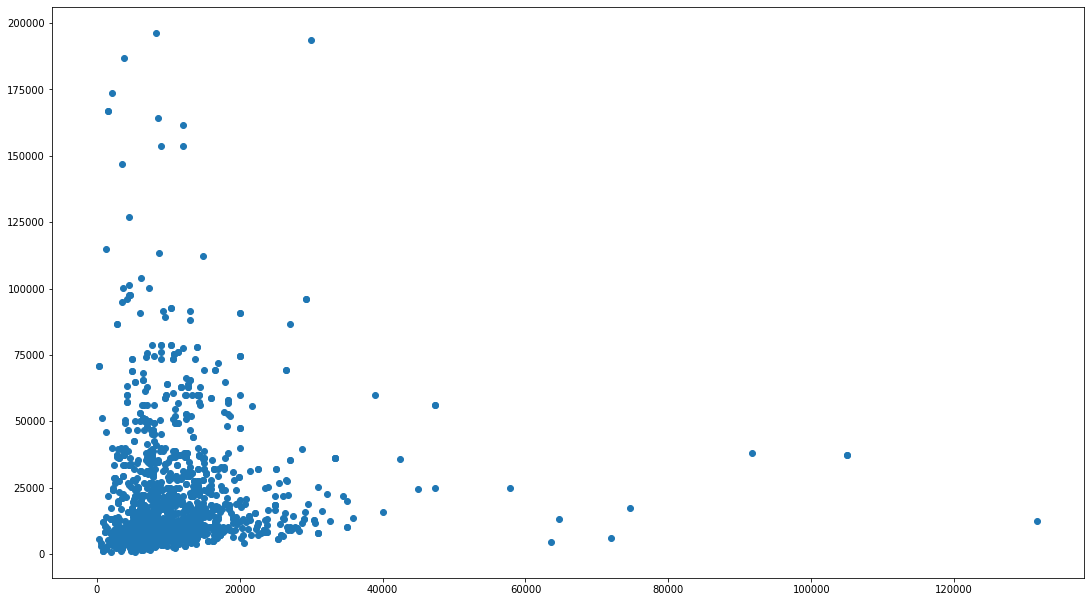

In [ ]:
## Car distance travelled divided by car age --> Car use per year 


df["car_dist_per_year"] = df["distance_travelled(kms)"]/df["car_age"]
distratio_price = df[["price","car_dist_per_year"]]
df=df.replace([np.inf, -np.inf], 0)
plt.scatter(distratio_price["car_dist_per_year"],distratio_price["price"])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
## Price of the car based on how old the car was when they purchased it (model year )

In [ ]:
max(df["year"])

2021

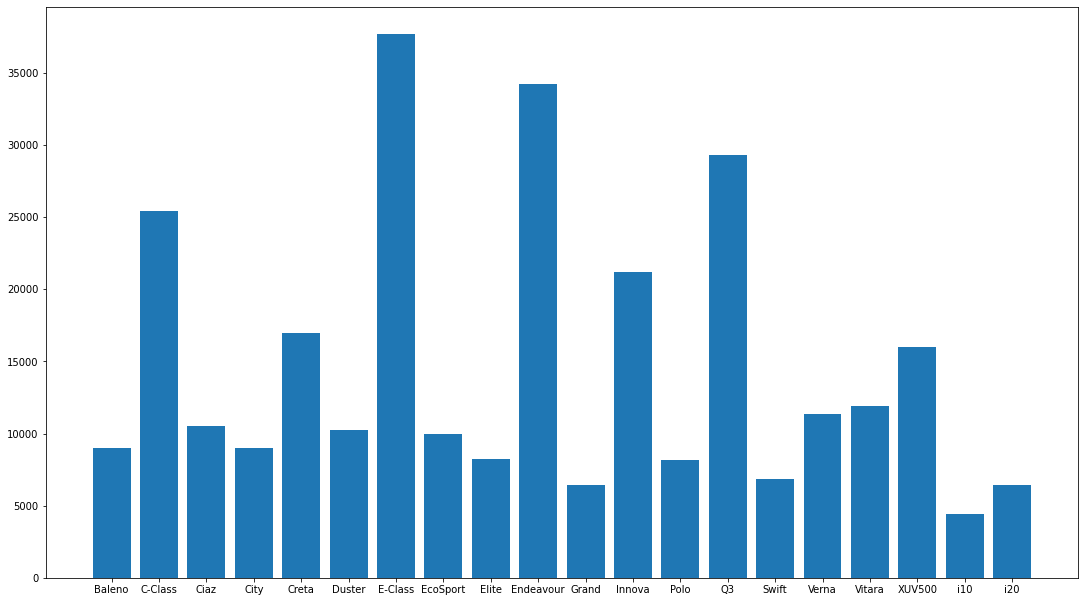

In [ ]:
##Taking the top 20 most common model names.
sizing = df.groupby("model_name").size().sort_values(ascending=False)
model_names = sizing[:20].index
capturing = df[df["model_name"].isin(model_names)]
average_model_price = capturing.groupby("model_name").agg(np.mean).reset_index()[["model_name","price"]]
plt.bar(average_model_price["model_name"],average_model_price["price"])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
## Assign each fuel type a different integer. 

def mapping(column):
  empty = []
  for i in column: 
    if i=="Petrol":
      empty.append(1)
    elif i=="Diesel":
      empty.append(0)
    elif i =="Petrol + 1":
      empty.append(2)

    elif i=="CNG + 1":
      empty.append(3)

    else:
      empty.append(4)

  return empty


df["fuel_map"] = mapping(df["fuel_type"])

In [ ]:
filtered = df[df["price"]<80001]
features_matrix = filtered[["year","distance_travelled(kms)","fuel_map","car_age","car_dist_per_year"]]
pricing_to_predict = list(round(i,0) for i in filtered["price"])


Text(0, 0.5, 'Residual')

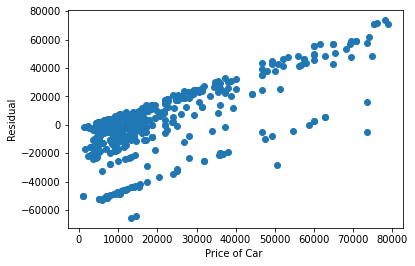

In [ ]:
##MLP trial 
X_train, X_test, y_train, y_test = train_test_split(features_matrix, pricing_to_predict, test_size=0.33, random_state=24)
clf = MLPClassifier(solver='adam',activation="relu")
clf.fit(X_train,y_train)
predictions  = clf.predict(X_test)

residuals = y_test-predictions 
plt.scatter(y_test,residuals)
plt.xlabel('Price of Car ')
plt.ylabel('Residual')

In [ ]:
##Define the prediction to be accurate if you are within 3000 dollars of the true price 

def accuracy (prediction_column,truth_column):
  empty_list = []
  for i in range(len(prediction_column)):
    if abs(prediction_column[i] - truth_column[i]) < 3000:
      empty_list.append(1)

    else: 
      empty_list.append(0)

  return empty_list
    

accuracy_of_mlp = accuracy(predictions,y_test)

sum(accuracy_of_mlp)/len(accuracy_of_mlp)





0.2513464991023339

Text(0, 0.5, 'Residual')

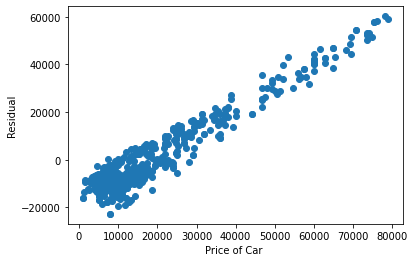

In [ ]:
##MLP regressor 
regr = MLPRegressor(random_state=1).fit(X_train, y_train)
regression_pred = regr.predict(X_test)

residuals2 = y_test-regression_pred 
plt.scatter(y_test,residuals2)
plt.xlabel('Price of Car ')
plt.ylabel('Residual')

In [ ]:
accuracy_of_reg = accuracy(y_test,regression_pred)
sum(accuracy_of_reg)/len(accuracy_of_reg)

0.10412926391382406

Text(0, 0.5, 'Residual')

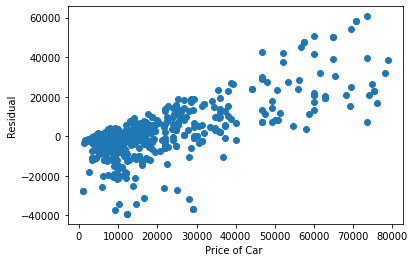

In [ ]:
##Random Forest
random_forest = RandomForestRegressor(max_depth=100, random_state=0)
random_forest.fit(X_train,y_train)
forest_regress = random_forest.predict(X_test)

residuals3 = y_test-forest_regress 
plt.scatter(y_test,residuals3)
plt.xlabel('Price of Car ')
plt.ylabel('Residual')

In [ ]:
accuracy_of_forest = accuracy(y_test,forest_regress)
sum(accuracy_of_forest)/len(accuracy_of_forest)

0.3985637342908438

Text(0, 0.5, 'Residual')

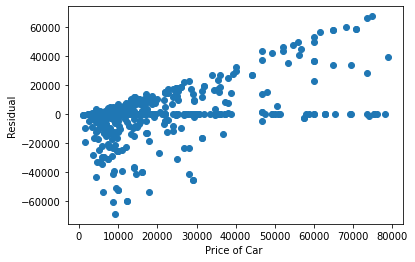

In [ ]:
##Nearest neighbor regressor 
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train, y_train)
neighbor_pred = neigh.predict(X_test)


residuals4 = y_test-neighbor_pred 
plt.scatter(y_test,residuals4)
plt.xlabel('Price of Car ')
plt.ylabel('Residual')


In [ ]:
accuracy_of_neigh = accuracy(y_test,neighbor_pred)
sum(accuracy_of_neigh)/len(accuracy_of_neigh)

0.5152603231597845

Text(0, 0.5, 'Residual')

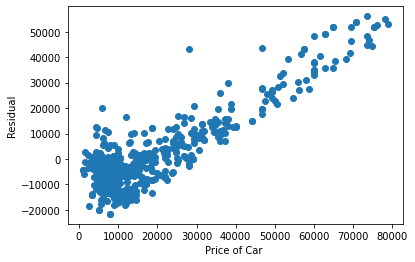

In [ ]:
## Linear regression
reg = LinearRegression().fit(X_train, y_train)
reg_pred = reg.predict(X_test)
residuals5 = y_test-reg_pred 
plt.scatter(y_test,residuals5)
plt.xlabel('Price of Car ')
plt.ylabel('Residual')

In [ ]:
accuracy_of_reg = accuracy(y_test,reg_pred)
sum(accuracy_of_reg)/len(accuracy_of_reg)

0.22621184919210055

In [ ]:
reg.coef_

array([ 6.19266890e+02, -5.06105396e-02, -1.15280619e+04, -6.19266890e+02,
        1.33406856e-01])

In [ ]:
X_train["car_age"].corr(X_train["car_dist_per_year"])

-0.20615693727288972

Text(0, 0.5, 'Residual')

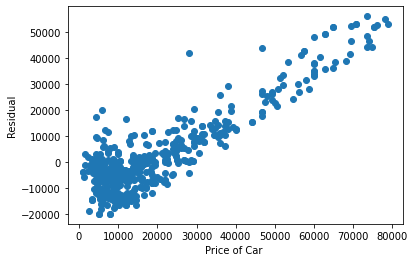

In [ ]:
X_train_regression = X_train.drop(["car_dist_per_year","year"],axis=1)
## Linear regression part 2 
reg2 = LinearRegression().fit(X_train_regression, y_train)
reg_pred2 = reg2.predict(X_test.drop(["car_dist_per_year","year"],axis=1))
residuals6 = y_test-reg_pred2 
plt.scatter(y_test,residuals6)
plt.xlabel('Price of Car ')
plt.ylabel('Residual')


In [ ]:
accuracy_of_reg2 = accuracy(y_test,reg_pred2)
sum(accuracy_of_reg2)/len(accuracy_of_reg2)

0.21543985637342908

Text(0, 0.5, 'Residual')

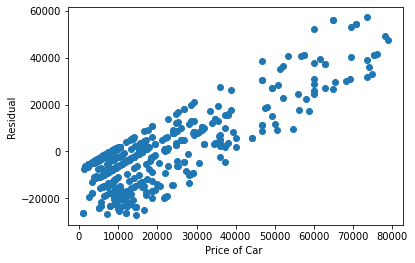

In [ ]:
## Ada boost regression 

ada_boost = AdaBoostRegressor(random_state=1)
ada_boost.fit(X_train,y_train)
ada_pred = ada_boost.predict(X_test)
residuals7 = y_test-ada_pred 
plt.scatter(y_test,residuals7)
plt.xlabel('Price of Car ')
plt.ylabel('Residual')


In [ ]:
accuracy_of_ada = accuracy(y_test,ada_pred)
sum(accuracy_of_ada)/len(accuracy_of_ada)

0.2459605026929982

Text(0, 0.5, 'Residual')

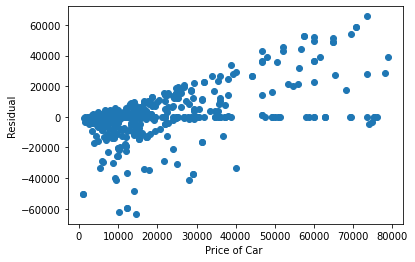

In [ ]:
decision_tree_reg = DecisionTreeRegressor(random_state=0)
decision_tree_reg.fit(X_train,y_train)
prediction_tree = decision_tree_reg.predict(X_test)
residuals8 = y_test-prediction_tree 
plt.scatter(y_test,residuals8)
plt.xlabel('Price of Car ')
plt.ylabel('Residual')

In [ ]:
accuracy_of_tree = accuracy(y_test,prediction_tree)
sum(accuracy_of_tree)/len(accuracy_of_tree)

0.518850987432675

In [ ]:
## Doing one hot encode for city and brand of car 



In [ ]:
cities = df[["city"]]
enc = preprocessing.OneHotEncoder()
enc.fit(cities)
onehotcolumns_city = enc.transform(cities).toarray()
onehotcolumns_city

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
list_of_cities = ['Mumbai', 'Thane', 'Dehradun', 'Navi Mumbai', 'Delhi', 'Noida', 'Ghaziabad', 'Panchkula', 'Faridabad', 'Agra', 'Lucknow','Bangalore', 'Hyderabad', 'Chennai', 'Pune']

list_of_cities = sorted(list_of_cities, key=str.lower)

print(list_of_cities)

['Agra', 'Bangalore', 'Chennai', 'Dehradun', 'Delhi', 'Faridabad', 'Ghaziabad', 'Hyderabad', 'Lucknow', 'Mumbai', 'Navi Mumbai', 'Noida', 'Panchkula', 'Pune', 'Thane']


In [ ]:
brand1 = df[["brand"]]
enc2 = preprocessing.OneHotEncoder()
enc2.fit(brand1)
onehotcolumns_brand = enc2.transform(brand1).toarray()
onehotcolumns_brand

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
list_of_brands = ['Honda', 'Nissan', 'Toyota', 'Mercedes-Benz', 'Hyundai',
       'Maruti Suzuki', 'Renault', 'Volkswagen', 'Skoda', 'BMW', 'Tata',
       'Audi', 'Bentley', 'Ford', 'Mahindra', 'Jaguar', 'Lamborghini',
       'MINI', 'Land Rover', 'Chevrolet', 'Datsun', 'Jeep', 'Porsche',
       'Volvo', 'MG', 'Lexus', 'Mitsubishi', 'Kia', 'Fiat', 'Isuzu',
       'Mahindra-Renault']

list_of_brands = sorted(list_of_brands, key=str.lower)

print(list_of_brands)

['Audi', 'Bentley', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Mahindra', 'Mahindra-Renault', 'Maruti Suzuki', 'Mercedes-Benz', 'MG', 'MINI', 'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


In [ ]:
model_name = df[["model_name"]]
enc3 = preprocessing.OneHotEncoder()
enc3.fit(model_name)
onehotcolumns_model = enc3.transform(model_name).toarray()
onehotcolumns_model

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
list_of_models = ['Brio', 'Sunny', 'Fortuner', 'E-Class', 'Verna', 'i20', 'Glanza',
       'GLE', 'Grand', 'Swift', 'Xcent', 'Innova', 'Baleno', 'Pulse',
       'Corolla', 'Polo', 'WR-V', 'Ritz', 'Rapid', 'City', 'Celerio', '3',
       'Vento', 'Jazz', 'Nano', 'GLA', 'A-Star', 'Q5', 'X1', 'Z4', 'A3',
       'A4', 'X3', 'Continental', 'Q3', 'Q7', 'A6', '7', 'Endeavour',
       'XUV500', 'F-Pace', 'XE', 'Gallardo', 'Countryman', 'C-Class',
       'Evoque', 'S-Class', 'Lodgy', 'CLA', 'Creta', 'A8', 'B-Class',
       'A-Class', '5', 'Cooper', 'Terrano', 'CR-V', 'Freelander', 'Ciaz',
       'Beat', 'KUV100', 'Duster', 'redi-GO', 'Tiago', 'Altroz', 'TUV300',
       'Vitara', 'Etios', 'Figo', 'Civic', 'Compass', 'Elite', 'Bolero',
       'SX4', 'Cayenne', 'V40', 'Superb', 'Dzire', 'i10', 'Zest', 'BR-V',
       'S-Cross', 'Elantra', 'Discovery', 'Accord', 'Scorpio', 'X5',
       'Estilo', 'XF', 'Santro', '6', 'GO', 'Passat', 'Wagon', 'Jetta',
       'Safari', 'EcoSport', 'Kwid', 'Hector', 'Mustang', 'SLK', 'X7',
       '718', 'Aria', '3.0', 'Land', 'GLC', 'NX', 'Thar', 'ES', 'GLS',
       'Ertiga', 'Ameo', 'Sport', 'Harrier', 'Outlander', 'Seltos',
       'Amaze', 'Octavia', 'M-Class', 'GL', 'XUV300', 'Avventura',
       'Micra', 'Eeco', 'Eon', 'Fluidic', 'Alto', 'Cross', 'Yaris',
       'Triber', 'Nexon', 'Tigor', 'Aspire', 'Venue', 'Freestyle', '4.4',
       'XL6', 'Qualis', 'Enjoy', 'Verito', 'S60', 'XC90', 'G-Class',
       'MU-X', 'Tiguan', 'Sonet', 'XJ', 'S90', 'Tucson', 'Indica',
       'Laura', 'Hexa', 'Captur', 'Yeti', 'Quanto', 'Camry', 'XC60',
       'Fiesta', 'CLS', 'X4', 'Ignis', 'Alturas', 'Abarth', 'Fabia',
       'Pajero', 'Cruze', 'Logan', 'Jeep']

list_of_models = sorted(list_of_models, key=str.lower)

print(list_of_models)

['3', '3.0', '4.4', '5', '6', '7', '718', 'A-Class', 'A-Star', 'A3', 'A4', 'A6', 'A8', 'Abarth', 'Accord', 'Alto', 'Altroz', 'Alturas', 'Amaze', 'Ameo', 'Aria', 'Aspire', 'Avventura', 'B-Class', 'Baleno', 'Beat', 'Bolero', 'BR-V', 'Brio', 'C-Class', 'Camry', 'Captur', 'Cayenne', 'Celerio', 'Ciaz', 'City', 'Civic', 'CLA', 'CLS', 'Compass', 'Continental', 'Cooper', 'Corolla', 'Countryman', 'CR-V', 'Creta', 'Cross', 'Cruze', 'Discovery', 'Duster', 'Dzire', 'E-Class', 'EcoSport', 'Eeco', 'Elantra', 'Elite', 'Endeavour', 'Enjoy', 'Eon', 'Ertiga', 'ES', 'Estilo', 'Etios', 'Evoque', 'F-Pace', 'Fabia', 'Fiesta', 'Figo', 'Fluidic', 'Fortuner', 'Freelander', 'Freestyle', 'G-Class', 'Gallardo', 'GL', 'GLA', 'Glanza', 'GLC', 'GLE', 'GLS', 'GO', 'Grand', 'Harrier', 'Hector', 'Hexa', 'i10', 'i20', 'Ignis', 'Indica', 'Innova', 'Jazz', 'Jeep', 'Jetta', 'KUV100', 'Kwid', 'Land', 'Laura', 'Lodgy', 'Logan', 'M-Class', 'Micra', 'MU-X', 'Mustang', 'Nano', 'Nexon', 'NX', 'Octavia', 'Outlander', 'Pajero', 'P

In [ ]:
df["model_name"].unique()

array(['Brio', 'Sunny', 'Fortuner', 'E-Class', 'Verna', 'i20', 'Glanza',
       'GLE', 'Grand', 'Swift', 'Xcent', 'Innova', 'Baleno', 'Pulse',
       'Corolla', 'Polo', 'WR-V', 'Ritz', 'Rapid', 'City', 'Celerio', '3',
       'Vento', 'Jazz', 'Nano', 'GLA', 'A-Star', 'Q5', 'X1', 'Z4', 'A3',
       'A4', 'X3', 'Continental', 'Q3', 'Q7', 'A6', '7', 'Endeavour',
       'XUV500', 'F-Pace', 'XE', 'Gallardo', 'Countryman', 'C-Class',
       'Evoque', 'S-Class', 'Lodgy', 'CLA', 'Creta', 'A8', 'B-Class',
       'A-Class', '5', 'Cooper', 'Terrano', 'CR-V', 'Freelander', 'Ciaz',
       'Beat', 'KUV100', 'Duster', 'redi-GO', 'Tiago', 'Altroz', 'TUV300',
       'Vitara', 'Etios', 'Figo', 'Civic', 'Compass', 'Elite', 'Bolero',
       'SX4', 'Cayenne', 'V40', 'Superb', 'Dzire', 'i10', 'Zest', 'BR-V',
       'S-Cross', 'Elantra', 'Discovery', 'Accord', 'Scorpio', 'X5',
       'Estilo', 'XF', 'Santro', '6', 'GO', 'Passat', 'Wagon', 'Jetta',
       'Safari', 'EcoSport', 'Kwid', 'Hector', 'Mustang', 'SLK

In [ ]:
cities_encode = pd.DataFrame(onehotcolumns_city,columns=list_of_cities)



X_train_new = X_train.copy()
X_train_new = X_train_new.merge(cities_encode,left_index = True, right_index = True)
X_test_new = X_test.copy()
X_test_new = X_test_new.merge(cities_encode,left_index = True, right_index = True)



In [ ]:
brands_encode = pd.DataFrame(onehotcolumns_brand,columns=list_of_brands)



X_train_new2 = X_train_new.copy()
X_train_new2 = X_train_new.merge(brands_encode,left_index = True, right_index = True)
X_test_new2 = X_test.copy()
X_test_new2 = X_test_new.merge(brands_encode,left_index = True, right_index = True)

In [ ]:
model_encode = pd.DataFrame(onehotcolumns_model,columns=list_of_models)



X_train_new3 = X_train_new2.copy()
X_train_new3 = X_train_new2.merge(model_encode,left_index = True, right_index = True)
X_test_new3 = X_test_new2.copy()
X_test_new3 = X_test_new2.merge(model_encode,left_index = True, right_index = True)

Text(0, 0.5, 'Residual')

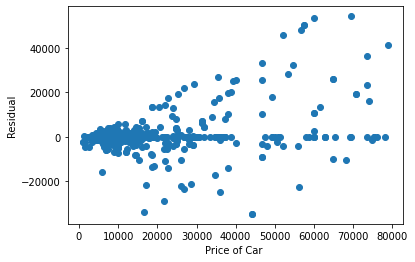

In [ ]:
decision_tree_reg3 = DecisionTreeRegressor(random_state=0)
decision_tree_reg3.fit(X_train_new3,y_train)
prediction_tree3 = decision_tree_reg3.predict(X_test_new3)
residuals11 = y_test-prediction_tree3 
plt.scatter(y_test,residuals11)
plt.xlabel('Price of Car ')
plt.ylabel('Residual')

In [ ]:
accuracy_of_tree4 = accuracy(y_test,prediction_tree3)
sum(accuracy_of_tree4)/len(accuracy_of_tree4)

0.755834829443447

In [ ]:
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

In [ ]:
df

,Unnamed: 0,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,...,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2,car_dist_per_year,fuel_map
0,0,0,2016,Honda,Honda Brio S MT,Brio,5673.77,9680.0,Petrol,Mumbai,...,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.000000,1936.000000,1
1,1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,4338.76,119120.0,Diesel,Mumbai,...,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.000000,13235.555556,0
2,2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,35377.60,64593.0,Diesel,Thane,...,0.000015,0.250000,1.000000,0.019416,0.004978,1.000000,96.646020,0.000000,16148.250000,0
3,3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,56003.40,25000.0,Diesel,Mumbai,...,0.000040,0.250000,0.500000,0.010692,0.013563,0.493750,71.604306,71.604306,6250.000000,0
4,4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,6341.27,23800.0,Diesel,Mumbai,...,0.000042,0.111111,0.071429,0.127871,0.014269,0.059821,109.150857,0.000000,2644.444444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,1720,1720,2015,Hyundai,Hyundai Eon Era +,Eon,3871.51,38000.0,Petrol,Pune,...,0.000026,0.166667,0.071429,0.212168,0.008771,0.059821,111.327773,0.000000,6333.333333,1
1721,1721,1721,2011,Bentley,Bentley Continental Flying Spur W12,Continental,100125.28,36000.0,Petrol,Pune,...,0.000028,0.100000,0.022727,0.004099,0.009283,0.010511,0.399987,0.000000,3600.000000,1
1722,1722,1722,2008,Mahindra-Renault,Mahindra-Renault Logan DLE 1.5 dci,Logan,2469.76,142522.0,Diesel,Pune,...,0.000007,0.076923,0.041667,0.335011,0.002014,0.029687,20.026662,0.000000,10963.230769,0
1723,1723,1723,1990,Mahindra,Mahindra Jeep CJ 500 D,Jeep,4338.76,18581.0,Diesel,Pune,...,0.000054,0.032258,0.041667,0.188859,0.018402,0.029687,103.172958,0.000000,599.387097,0
